# 10720PHYS401200 Homework-1

## Problem 3: Data-bunch

Implement data-bunch. Test it for a single, very long, simulation of Markov-chain sampling of π with throwing ranges $\delta \in \{0.03, 0.1, 0.3\}$. Plot apparent error as a function of the size of the bunch.

In [2]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def data_creating(N, x_i, y_i, delta):
    '''
    I/P: # of data to be created, start_x, start_y, step 
    O/P: data (a list) whose length is N
    '''
    x, y = x_i, y_i
    data = []
    for i in range(N):
        dx = delta * (np.random.random()*2 - 1)
        dy = delta * (np.random.random()*2 - 1)
        if abs(x+dx) < 1 and abs(y+dy) < 1:
            x += dx
            y += dy
        else:
            x = x
            y = y
        if x**2 + y**2 <= 1:
            data.append(1)
        else:
            data.append(0)
    return data

def data_folding_err(data, Nf, delta):
    '''
    I/P: data to be folded, times to fold data, step
    O/P: (1) Return error
         (2) Print mean, est_π, var, std, error 
    '''
    mean = []; var = []; std = []; err = []
    print('\ndelta:{:6f}'.format(delta))
    
    for j in range(Nf):
        temp = []
        for i in range(len(data)):
            temp.append((data[i] - sum(data)/len(data))**2)
        mean.append(sum(data)/len(data))
        var.append(sum(temp)/len(data))
        std.append((sum(temp)/len(data))**0.5)
        err.append((sum(temp)/len(data))**0.5/(len(data)**0.5))
        print('N:{:2d}, mean:{:6f}, est_π:{:6f}, var:{:6f}, std:{:6f}, err:{:6f}'.format(j, mean[j], 4*mean[j], var[j], std[j], err[j]))
        
        new_data = []
        for i in range(len(data)-1):
            if i % 2 == 0:
                new_data.append((data[i]+data[i+1])/2)
        data = new_data
    return err

In [5]:
Num_Sample = 2**14
Num_Fold = 14+1

data_003 = data_creating(Num_Sample, 1.0, 1.0, 0.03)
data_01 = data_creating(Num_Sample, 1.0, 1.0, 0.1)
data_03 = data_creating(Num_Sample, 1.0, 1.0, 0.3)

err_003 = data_folding_err(data_003, Num_Fold, 0.03)
err_01 = data_folding_err(data_01, Num_Fold, 0.1)
err_03 = data_folding_err(data_03, Num_Fold, 0.3)


delta:0.030000
N: 0, mean:0.625610, est_π:2.502441, var:0.234222, std:0.483965, err:0.003781
N: 1, mean:0.625610, est_π:2.502441, var:0.226287, std:0.475697, err:0.005256
N: 2, mean:0.625610, est_π:2.502441, var:0.219299, std:0.468294, err:0.007317
N: 3, mean:0.625610, est_π:2.502441, var:0.210830, std:0.459163, err:0.010146
N: 4, mean:0.625610, est_π:2.502441, var:0.201988, std:0.449431, err:0.014045
N: 5, mean:0.625610, est_π:2.502441, var:0.189849, std:0.435717, err:0.019256
N: 6, mean:0.625610, est_π:2.502441, var:0.175123, std:0.418477, err:0.026155
N: 7, mean:0.625610, est_π:2.502441, var:0.158502, std:0.398123, err:0.035189
N: 8, mean:0.625610, est_π:2.502441, var:0.138281, std:0.371861, err:0.046483
N: 9, mean:0.625610, est_π:2.502441, var:0.116806, std:0.341769, err:0.060417
N:10, mean:0.625610, est_π:2.502441, var:0.084574, std:0.290817, err:0.072704
N:11, mean:0.625610, est_π:2.502441, var:0.040943, std:0.202343, err:0.071539
N:12, mean:0.625610, est_π:2.502441, var:0.03179

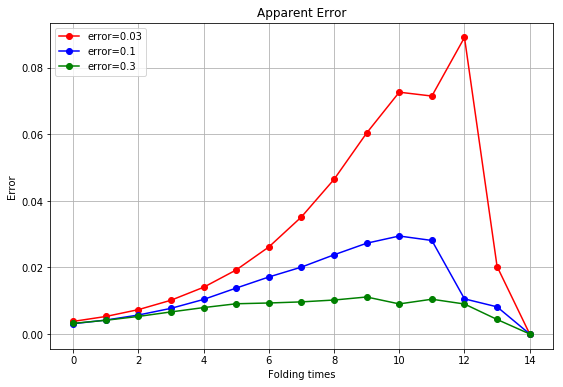

In [6]:
data_num = np.arange(0, Num_Fold, 1)

plt.figure(figsize=(9,6))
plt.plot(data_num, err_003, 'ro-', label=r'error=0.03')
plt.plot(data_num, err_01, 'bo-', label=r'error=0.1')
plt.plot(data_num, err_03, 'go-', label=r'error=0.3')
plt.title(r'Apparent Error')
plt.xlabel(r'Folding times')
plt.ylabel(r'Error')
plt.grid(); plt.legend(); plt.show()